In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

from utils.DomainImageGenerator import DomainImageGenerator

2025-07-16 13:28:20.536965: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 13:28:20.540858: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 13:28:20.553450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752665300.573959  645821 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752665300.580249  645821 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-16 13:28:20.602298: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
test_gen = DomainImageGenerator("prepared/test.csv", batch_size=64, img_size=(32, 32), shuffle=False)

test_gen.shuffle_indexes()
test_indexes = test_gen.return_Indexes()
X_test = test_gen.return_Img_by_Index(test_indexes)
y_test = test_gen.return_Label_by_Index(test_indexes)

Loading images: 100%|███████████████████| 90000/90000 [00:59<00:00, 1507.82it/s]


In [3]:
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [4]:
y_pred = np.ones_like(y_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.7778


In [5]:
print(classification_report(y_test, y_pred, target_names=["CIFAR-10", "ImageNet"]))

              precision    recall  f1-score   support

    CIFAR-10       0.00      0.00      0.00     20000
    ImageNet       0.78      1.00      0.88     70000

    accuracy                           0.78     90000
   macro avg       0.39      0.50      0.44     90000
weighted avg       0.60      0.78      0.68     90000



/scratch/aaki/envs/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/scratch/aaki/envs/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/scratch/aaki/envs/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


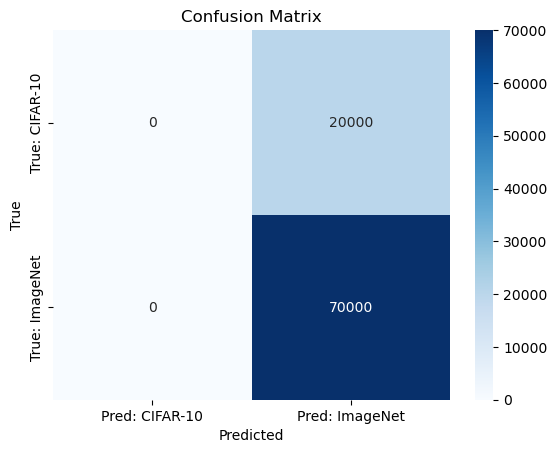

In [6]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred: CIFAR-10", "Pred: ImageNet"],
            yticklabels=["True: CIFAR-10", "True: ImageNet"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()